### Material for reference

https://medium.com/analytics-vidhya/automated-keyword-extraction-from-articles-using-nlp-bfd864f41b34

https://towardsdatascience.com/keyword-extraction-with-bert-724efca412ea

In [1]:
import pandas as pd
df = pd.read_csv('both.csv')
#df = df.drop(['Unnamed: 0'],axis=1)
df.head()

,titulo,ano,abstract
0,‘We are not the Wild West’: anti-fracking prot...,2015,The protests against recent proposals for expl...
1,« Faire la politique soi-même » : le cas des m...,2015,The literature on activism characterizes the r...
2,¨ A Dilemma of Abundance: Governance Challenge...,2013,Shale gas proponents argue this unconventional...
3,A framework for Social Impact Assessment of sh...,2018,This report is one component of a larger task ...
4,A New York or Pennsylvania state of mind: soci...,2014,What first comes to mind when you think of nat...


In [2]:
df.shape

(169, 3)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   titulo    169 non-null    object
 1   ano       169 non-null    int64 
 2   abstract  169 non-null    object
dtypes: int64(1), object(2)
memory usage: 4.1+ KB


In [4]:
df['full'] = df['titulo'] + ' ' + df['abstract'] #joining title and abstract

In [5]:
df.head()

,titulo,ano,abstract,full
0,‘We are not the Wild West’: anti-fracking prot...,2015,The protests against recent proposals for expl...,‘We are not the Wild West’: anti-fracking prot...
1,« Faire la politique soi-même » : le cas des m...,2015,The literature on activism characterizes the r...,« Faire la politique soi-même » : le cas des m...
2,¨ A Dilemma of Abundance: Governance Challenge...,2013,Shale gas proponents argue this unconventional...,¨ A Dilemma of Abundance: Governance Challenge...
3,A framework for Social Impact Assessment of sh...,2018,This report is one component of a larger task ...,A framework for Social Impact Assessment of sh...
4,A New York or Pennsylvania state of mind: soci...,2014,What first comes to mind when you think of nat...,A New York or Pennsylvania state of mind: soci...


In [6]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English

In [7]:
# define the stop words
import string

punctuations = string.punctuation
stopwords = list(STOP_WORDS)
stopwords[:20]

['should',
 'go',
 'forty',
 "'m",
 'became',
 'herself',
 'something',
 'rather',
 'formerly',
 'are',
 'several',
 'these',
 'do',
 '‘d',
 'empty',
 'not',
 'thereafter',
 'both',
 'bottom',
 'hereupon']

In [8]:
# add some custom stop words
custom_stop_words = [
    'doi', 'preprint', 'copyright', 'peer', 'reviewed', 'org', 'https', 'et', 'al', 'author', 'figure', 
    'rights', 'reserved', 'permission', 'used', 'using', 'biorxiv', 'medrxiv', 'license', 'fig', 'fig.', 
    'al.', 'Elsevier', 'PMC', 'CZI', 'www'
]
for w in custom_stop_words:
    if w not in stopwords:
        stopwords.append(w)

In [9]:
df['word_count'] = df['full'].apply(lambda x: len(str(x).split(" ")))
df.head()

,titulo,ano,abstract,full,word_count
0,‘We are not the Wild West’: anti-fracking prot...,2015,The protests against recent proposals for expl...,‘We are not the Wild West’: anti-fracking prot...,114
1,« Faire la politique soi-même » : le cas des m...,2015,The literature on activism characterizes the r...,« Faire la politique soi-même » : le cas des m...,243
2,¨ A Dilemma of Abundance: Governance Challenge...,2013,Shale gas proponents argue this unconventional...,¨ A Dilemma of Abundance: Governance Challenge...,200
3,A framework for Social Impact Assessment of sh...,2018,This report is one component of a larger task ...,A framework for Social Impact Assessment of sh...,98
4,A New York or Pennsylvania state of mind: soci...,2014,What first comes to mind when you think of nat...,A New York or Pennsylvania state of mind: soci...,267


In [10]:
df.shape

(169, 5)

In [11]:
# calculate the frequency of each word
freq = pd.Series(' '.join(df['full']).split()).value_counts()[:20]
freq

the            2197
and            1855
of             1748
in             1059
to             1009
gas             676
a               590
shale           556
for             421
that            387
on              374
is              358
with            269
The             261
as              260
development     245
energy          226
from            204
by              199
are             192
dtype: int64

In [12]:
freq1 =  pd.Series(' '.join(df
         ['full']).split()).value_counts()[-20:]
freq1

ecommendations    1
Dennis            1
jurisdiction      1
resistance.       1
NUMBYism          1
Scandinavia’s     1
biological        1
attenuate         1
superior          1
“negative         1
ALLARM            1
“North            1
al                1
affirming         1
“anti-science”    1
590)              1
Etiology          1
residential,      1
regulators,       1
retraite,         1
dtype: int64

In [13]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer#nltk.download('wordnet') 
from nltk.stem.wordnet import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /home/sara/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
##Creating a list of stop words and adding custom stopwords
stop_words = set(stopwords.words("english"))##Creating a list of custom stopwords
new_words = ["using", "show", "result", "large", "also", "iv", "one", "two", "new", "previously", "shown",
            'based','well','more','studying','abstract','et al']
stop_words = stop_words.union(new_words)
stop_words

{'a',
 'about',
 'above',
 'abstract',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'based',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'et al',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'iv',
 'just',
 'large',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'new',
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'one',
 'only',
 

In [15]:
df = df.reset_index()

In [16]:
df.full

0      ‘We are not the Wild West’: anti-fracking prot...
1      « Faire la politique soi-même » : le cas des m...
2      ¨ A Dilemma of Abundance: Governance Challenge...
3      A framework for Social Impact Assessment of sh...
4      A New York or Pennsylvania state of mind: soci...
                             ...                        
164    Fuel to the fire : Risk governance and framing...
165    'Greenwashing gas: Might a 'transition fuel' l...
166    Argentina entra con YPF en el club de las NOC ...
167    Asian Interests in the Arctic: Risks and Gains...
168    Scientific assessments: Matching the process t...
Name: full, Length: 169, dtype: object

In [17]:
size = df.shape[0]

In [18]:
# loop to remove all characters that are not necessary
nltk.download('wordnet')
corpus = []
for i in range(0, size):
    #Remove punctuations
    #text = re.sub('[^a-zA-Z]', ' ', df['abstract'][i])
    text = df['full'][i]
    #Convert to lowercase
    text = text.lower()
    #text = df['full'][i].lower()
    #remove tags
    #text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # remove special characters and digits
    #text=re.sub("(\\d|\\W)+"," ",text)
    
    ##Convert to list from string
    text = text.split()
    
    ##Stemming
    ps=PorterStemmer()    #Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in  
            stop_words] 
    text = " ".join(text)
    corpus.append(text)

[nltk_data] Downloading package wordnet to /home/sara/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [19]:
corpus[2]

'¨ dilemma abundance: governance challenge reconciling shale gas development climate change mitigation shale gas proponent argue unconventional fossil fuel offer “bridge” towards cleaner energy system offsetting higher-carbon fuel coal. technical feasibility reconciling shale gas development climate action remains contested. however, argue governance challenge pressing profound. reconciling shale gas climate action requires institution capable responding effectively uncertainty; intervening mandate emission reduction internalize cost industry; managing energy system strategically towards lower carbon future. policy measure prove challenging, particularly jurisdiction stand benefit economically unconventional fuels. illustrate dilemma case study shale gas development british columbia, canada, global leader climate policy nonetheless struggling manage gas development mitigation. bc case indicative constraint jurisdiction face reconcile gas development climate action, manage industry adeq

Text(0.5, 1.0, 'Top most common 100 words from Public Perception spreadsheet')

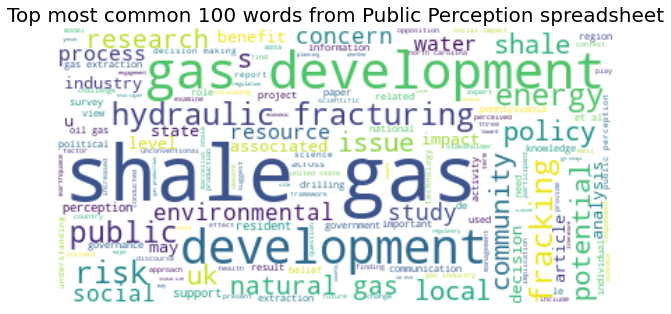

In [23]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline
words_except_stop_dist = nltk.FreqDist(w for w in corpus[:100]) 
wordcloud = WordCloud(stopwords=set(STOPWORDS),background_color='white').generate(" ".join(words_except_stop_dist))
plt.imshow(wordcloud,interpolation = 'bilinear')
fig=plt.gcf()
fig.set_size_inches(10,12)
plt.axis('off')
plt.title("Top most common 100 words from Public Perception spreadsheet",fontsize=20)

In [24]:
#start vectorizing the texts
from sklearn.feature_extraction.text import CountVectorizer
import re
cv=CountVectorizer(max_df=0.8,stop_words=stop_words, max_features=10000, ngram_range=(1,3))
X=cv.fit_transform(corpus)

/home/sara/.local/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['al', 'et'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [25]:
list(cv.vocabulary_.keys())[:15]

['west',
 'anti',
 'fracking',
 'protest',
 'romania',
 'recent',
 'proposal',
 'exploring',
 'extracting',
 'analysed',
 'examining',
 'specific',
 'demand',
 'formulated',
 'investigate']

[Text(0, 0, 'gas'),
 Text(1, 0, 'shale'),
 Text(2, 0, 'development'),
 Text(3, 0, 'energy'),
 Text(4, 0, 'public'),
 Text(5, 0, 'policy'),
 Text(6, 0, 'environmental'),
 Text(7, 0, 'water'),
 Text(8, 0, 'fracking'),
 Text(9, 0, 'risk'),
 Text(10, 0, 'impact'),
 Text(11, 0, 'fracturing'),
 Text(12, 0, 'hydraulic'),
 Text(13, 0, 'social'),
 Text(14, 0, 'state'),
 Text(15, 0, 'governance'),
 Text(16, 0, 'industry'),
 Text(17, 0, 'natural'),
 Text(18, 0, 'decision'),
 Text(19, 0, 'resource')]

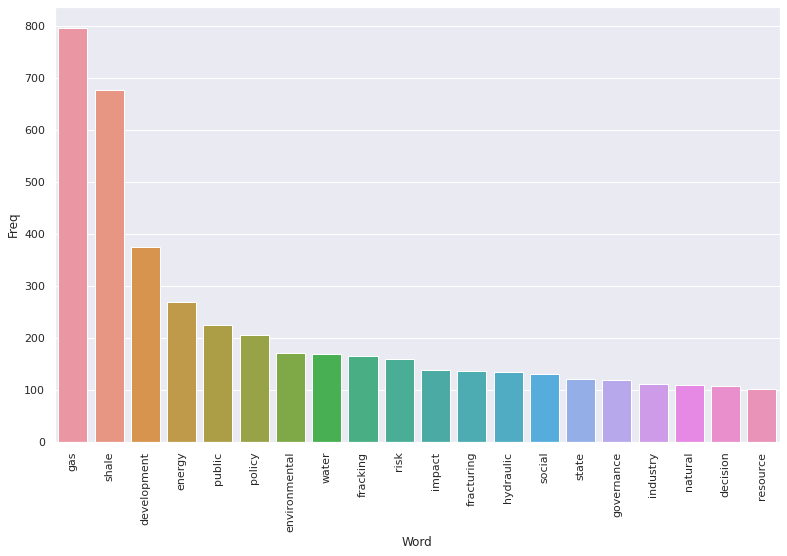

In [26]:
# get top words based on frequency
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:n]#Convert most freq words to dataframe for plotting bar plot
top_words = get_top_n_words(corpus, n=20)
top_df = pd.DataFrame(top_words)
top_df.columns=["Word", "Freq"]#Barplot of most freq words
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

[Text(0, 0, 'shale gas'),
 Text(1, 0, 'gas development'),
 Text(2, 0, 'hydraulic fracturing'),
 Text(3, 0, 'natural gas'),
 Text(4, 0, 'decision making'),
 Text(5, 0, 'gas extraction'),
 Text(6, 0, 'oil gas'),
 Text(7, 0, 'water resource'),
 Text(8, 0, 'climate change'),
 Text(9, 0, 'et al'),
 Text(10, 0, 'gas production'),
 Text(11, 0, 'unconventional gas'),
 Text(12, 0, 'shale development'),
 Text(13, 0, 'gas industry'),
 Text(14, 0, 'marcellus shale'),
 Text(15, 0, 'united state'),
 Text(16, 0, 'public health'),
 Text(17, 0, 'case study'),
 Text(18, 0, 'environmental justice'),
 Text(19, 0, 'energy policy'),
 Text(20, 0, 'public perception'),
 Text(21, 0, 'north carolina'),
 Text(22, 0, 'energy development'),
 Text(23, 0, 'social impact'),
 Text(24, 0, 'south africa'),
 Text(25, 0, 'energy security'),
 Text(26, 0, 'gas exploration'),
 Text(27, 0, 'renewable energy'),
 Text(28, 0, 'land use'),
 Text(29, 0, 'united kingdom')]

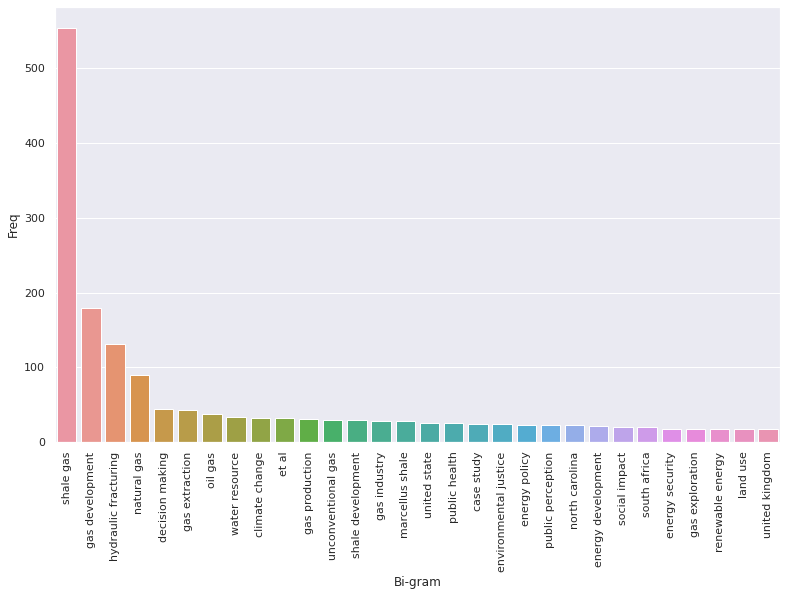

In [27]:
#Most frequently occuring Bi-grams
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

top2_words = get_top_n2_words(corpus, n=30)
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
#print(top2_df)#Barplot of most freq Bi-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Bi-gram", y="Freq", data=top2_df)
h.set_xticklabels(h.get_xticklabels(), rotation=90)

[Text(0, 0, 'shale gas development'),
 Text(1, 0, 'shale gas extraction'),
 Text(2, 0, 'shale gas production'),
 Text(3, 0, 'impact shale gas'),
 Text(4, 0, 'development shale gas'),
 Text(5, 0, 'shale gas exploration'),
 Text(6, 0, 'shale gas industry'),
 Text(7, 0, 'natural gas development'),
 Text(8, 0, 'hydraulic fracturing fracking'),
 Text(9, 0, 'shale gas oil'),
 Text(10, 0, 'perception shale gas'),
 Text(11, 0, 'shale gas fracking'),
 Text(12, 0, 'fracturing shale gas'),
 Text(13, 0, 'water resource management'),
 Text(14, 0, 'hydraulic fracturing shale'),
 Text(15, 0, 'shale gas policy'),
 Text(16, 0, 'shale gas mining'),
 Text(17, 0, 'associated shale gas'),
 Text(18, 0, 'public perception shale'),
 Text(19, 0, 'unconventional shale gas')]

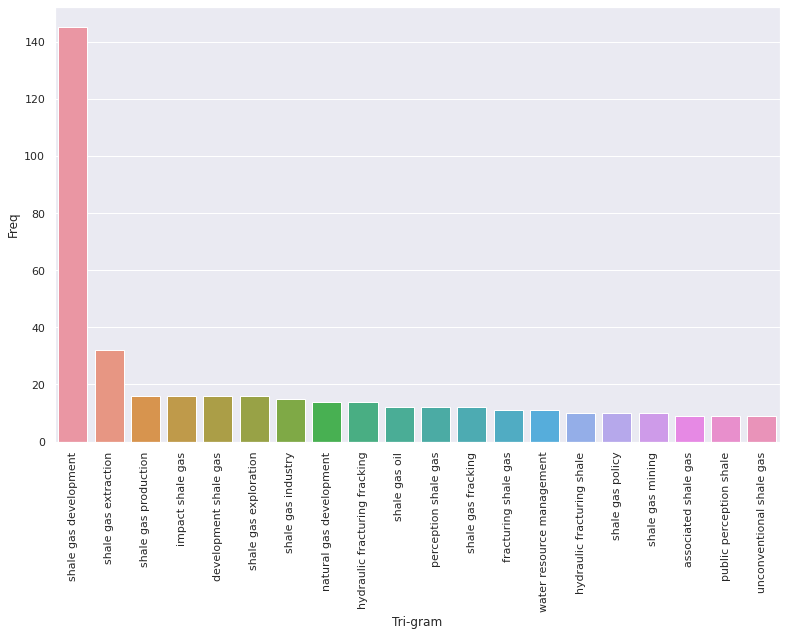

In [28]:
#Most frequently occuring Tri-grams
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

top3_words = get_top_n3_words(corpus, n=20)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
#print(top3_df)#Barplot of most freq Tri-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
j=sns.barplot(x="Tri-gram", y="Freq", data=top3_df)
j.set_xticklabels(j.get_xticklabels(), rotation=90)

In [29]:
df['Keyword'] = 0
#Now I've used TfidfTransformer to define a score for each word
for i in range(0,size):
    num = i
    from sklearn.feature_extraction.text import TfidfTransformer
 
    tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
    tfidf_transformer.fit(X)# get feature names
    feature_names=cv.get_feature_names()
 
    # fetch document for which keywords needs to be extracted
    doc=corpus[num]
 
    #generate tf-idf for the given document
    tf_idf_vector=tfidf_transformer.transform(cv.transform([doc]))

    from scipy.sparse import coo_matrix
    def sort_coo(coo_matrix):
        tuples = zip(coo_matrix.col, coo_matrix.data)
        return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)
 
    def extract_topn_from_vector(feature_names, sorted_items, topn=20):
        """get the feature names and tf-idf score of top n items"""
    
        #use only topn items from vector
        sorted_items = sorted_items[:topn]
 
        score_vals = []
        feature_vals = []
    
        # word index and corresponding tf-idf score
        for idx, score in sorted_items:
        
        #keep track of feature name and its corresponding score
            score_vals.append(round(score, 3))
            feature_vals.append(feature_names[idx])
 
    #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
        results= {}
        for idx in range(len(feature_vals)):
            results[feature_vals[idx]]=score_vals[idx]
    
        return results#sort the tf-idf vectors by descending order of scores

    sorted_items=sort_coo(tf_idf_vector.tocoo())#extract only the top n; n here is 10

    keywords=extract_topn_from_vector(feature_names,sorted_items,20)
 
# now print the results
#print("\nAbstract:")
#print(doc)
#print("\nKeywords:")
    l = []
    for k in keywords:
        l.append(k)
    #print(k,keywords[k])
    df['Keyword'][num] = l

/home/sara/.local/lib/python3.6/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/sara/.local/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/sara/.local/lib/python3.6/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/sara/.local/lib/python3.6/site-packag

/home/sara/.local/lib/python3.6/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/sara/.local/lib/python3.6/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/sara/.local/lib/python3.6/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/sara/.local/lib/python3.6/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarn

/home/sara/.local/lib/python3.6/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/sara/.local/lib/python3.6/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/sara/.local/lib/python3.6/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/sara/.local/lib/python3.6/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarn

/home/sara/.local/lib/python3.6/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/sara/.local/lib/python3.6/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/sara/.local/lib/python3.6/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/sara/.local/lib/python3.6/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarn

/home/sara/.local/lib/python3.6/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/sara/.local/lib/python3.6/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/sara/.local/lib/python3.6/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/sara/.local/lib/python3.6/site-packages/ipykernel_launcher.py:58: SettingWithCopyWarn

In [30]:
df.head()

,index,titulo,ano,abstract,full,word_count,Keyword
0,0,‘We are not the Wild West’: anti-fracking prot...,2015,The protests against recent proposals for expl...,‘We are not the Wild West’: anti-fracking prot...,114,"[protest, specific, romania, natural resources..."
1,1,« Faire la politique soi-même » : le cas des m...,2015,The literature on activism characterizes the r...,« Faire la politique soi-même » : le cas des m...,243,"[politics, diy politics, diy, institutional, r..."
2,2,¨ A Dilemma of Abundance: Governance Challenge...,2013,Shale gas proponents argue this unconventional...,¨ A Dilemma of Abundance: Governance Challenge...,200,"[climate, reconciling shale gas, reconciling s..."
3,3,A framework for Social Impact Assessment of sh...,2018,This report is one component of a larger task ...,A framework for Social Impact Assessment of sh...,98,"[northern territory, coffey, territory, northe..."
4,4,A New York or Pennsylvania state of mind: soci...,2014,What first comes to mind when you think of nat...,A New York or Pennsylvania state of mind: soci...,267,"[newspaper, representation, gas development ma..."


In [31]:
df.to_csv('keywords.csv')